In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, CuDNNLSTM, Dropout
import numpy as np
import pandas as pd

In [17]:
data = pd.read_csv('input2.csv')
data.work = data.work.map(lambda x: int(x))
data2 = data.drop(['pload'], axis=1)
data2.date = pd.to_datetime(data2.date)
data2['doy'] = data2.date.map(lambda x: x.dayofyear)
data2['hour'] = data2.date.map(lambda x: x.hour)
data2

,date,load,work,temp,dewp,doy,hour
0,2015-07-01 08:00:00,1605.0,1,73.0,64.0,182,8
1,2015-07-01 09:00:00,1537.0,1,74.0,64.0,182,9
2,2015-07-01 10:00:00,1487.0,1,73.0,64.0,182,10
3,2015-07-01 11:00:00,1470.0,1,73.0,66.0,182,11
4,2015-07-01 12:00:00,1503.0,1,72.5,65.5,182,12
5,2015-07-01 13:00:00,1511.0,1,75.0,64.0,182,13
6,2015-07-01 14:00:00,1566.0,1,77.0,64.0,182,14
7,2015-07-01 15:00:00,1612.0,1,82.0,63.0,182,15
8,2015-07-01 16:00:00,1655.0,1,85.0,62.0,182,16
9,2015-07-01 17:00:00,1805.0,1,90.0,60.0,182,17


In [18]:
data3  = data2[['date', 'load']]
data3.date = pd.to_datetime(data3.date.map(lambda x: x - pd.DateOffset(years=-1)))
data3.rename(columns={'load':'lyload'}, inplace=True)
data3

C:\Users\aloder\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\aloder\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,date,lyload
0,2016-07-01 08:00:00,1605.0
1,2016-07-01 09:00:00,1537.0
2,2016-07-01 10:00:00,1487.0
3,2016-07-01 11:00:00,1470.0
4,2016-07-01 12:00:00,1503.0
5,2016-07-01 13:00:00,1511.0
6,2016-07-01 14:00:00,1566.0
7,2016-07-01 15:00:00,1612.0
8,2016-07-01 16:00:00,1655.0
9,2016-07-01 17:00:00,1805.0


In [19]:
datalagged = data2.merge(data3, left_on='date', right_on='date')
datalagged

,date,load,work,temp,dewp,doy,hour,lyload
0,2016-07-01 08:00:00,1530.0,1,76.00,67.0,183,8,1605.0
1,2016-07-01 09:00:00,1490.0,1,76.00,67.0,183,9,1537.0
2,2016-07-01 10:00:00,1448.0,1,76.00,66.0,183,10,1487.0
3,2016-07-01 11:00:00,1447.0,1,76.00,65.0,183,11,1470.0
4,2016-07-01 12:00:00,1465.0,1,75.50,65.5,183,12,1503.0
5,2016-07-01 13:00:00,1496.0,1,76.00,67.0,183,13,1511.0
6,2016-07-01 14:00:00,1569.0,1,78.00,67.0,183,14,1566.0
7,2016-07-01 15:00:00,1679.0,1,77.00,68.0,183,15,1612.0
8,2016-07-01 16:00:00,1774.0,1,78.00,68.0,183,16,1655.0
9,2016-07-01 17:00:00,1849.0,1,71.00,68.0,183,17,1805.0


In [20]:
test = data2.set_index('date')['2017'].reset_index()
training = data2.set_index('date')[:'2016'].reset_index()
features = ['temp', 'doy', 'work', 'hour', 'load']

In [21]:
 training[features].values

array([[7.300e+01, 1.820e+02, 1.000e+00, 8.000e+00, 1.605e+03],
       [7.400e+01, 1.820e+02, 1.000e+00, 9.000e+00, 1.537e+03],
       [7.300e+01, 1.820e+02, 1.000e+00, 1.000e+01, 1.487e+03],
       ...,
       [5.600e+01, 3.660e+02, 0.000e+00, 2.100e+01, 1.457e+03],
       [5.700e+01, 3.660e+02, 0.000e+00, 2.200e+01, 1.433e+03],
       [5.700e+01, 3.660e+02, 0.000e+00, 2.300e+01, 1.432e+03]])

In [22]:
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE-1):
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE][len(features) - 1]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    
    
SEQUENCE_SIZE = 25
x_train,y_train = to_sequences(SEQUENCE_SIZE, training[features].values)
x_test,y_test = to_sequences(SEQUENCE_SIZE, test[features].values)

In [23]:
print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))
x_train

Shape of training set: (12611, 25, 5)
Shape of test set: (8503, 25, 5)


array([[[7.300e+01, 1.820e+02, 1.000e+00, 8.000e+00, 1.605e+03],
        [7.400e+01, 1.820e+02, 1.000e+00, 9.000e+00, 1.537e+03],
        [7.300e+01, 1.820e+02, 1.000e+00, 1.000e+01, 1.487e+03],
        ...,
        [7.850e+01, 1.830e+02, 1.000e+00, 6.000e+00, 1.759e+03],
        [7.700e+01, 1.830e+02, 1.000e+00, 7.000e+00, 1.643e+03],
        [7.600e+01, 1.830e+02, 1.000e+00, 8.000e+00, 1.542e+03]],

       [[7.400e+01, 1.820e+02, 1.000e+00, 9.000e+00, 1.537e+03],
        [7.300e+01, 1.820e+02, 1.000e+00, 1.000e+01, 1.487e+03],
        [7.300e+01, 1.820e+02, 1.000e+00, 1.100e+01, 1.470e+03],
        ...,
        [7.700e+01, 1.830e+02, 1.000e+00, 7.000e+00, 1.643e+03],
        [7.600e+01, 1.830e+02, 1.000e+00, 8.000e+00, 1.542e+03],
        [7.500e+01, 1.830e+02, 1.000e+00, 9.000e+00, 1.489e+03]],

       [[7.300e+01, 1.820e+02, 1.000e+00, 1.000e+01, 1.487e+03],
        [7.300e+01, 1.820e+02, 1.000e+00, 1.100e+01, 1.470e+03],
        [7.250e+01, 1.820e+02, 1.000e+00, 1.200e+01, 1.503e+

In [24]:
def build_model2():
    model = keras.Sequential([
        CuDNNLSTM(256, input_shape=x_train.shape[1:], return_sequences=True),
        Dropout(0.2),
        CuDNNLSTM(256),
        Dropout(0.2),
        Dense(256,activation='relu'),
        Dropout(0.2),
        Dense(256,activation='relu'),
        Dense(128,activation='relu'),
        Dense(1)
    ])
    model.add
    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mape'])
    return model
model = build_model2()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_2 (CuDNNLSTM)     (None, 25, 256)           269312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 256)           0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 256)               526336    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
__________

In [25]:
x_train

array([[[7.300e+01, 1.820e+02, 1.000e+00, 8.000e+00, 1.605e+03],
        [7.400e+01, 1.820e+02, 1.000e+00, 9.000e+00, 1.537e+03],
        [7.300e+01, 1.820e+02, 1.000e+00, 1.000e+01, 1.487e+03],
        ...,
        [7.850e+01, 1.830e+02, 1.000e+00, 6.000e+00, 1.759e+03],
        [7.700e+01, 1.830e+02, 1.000e+00, 7.000e+00, 1.643e+03],
        [7.600e+01, 1.830e+02, 1.000e+00, 8.000e+00, 1.542e+03]],

       [[7.400e+01, 1.820e+02, 1.000e+00, 9.000e+00, 1.537e+03],
        [7.300e+01, 1.820e+02, 1.000e+00, 1.000e+01, 1.487e+03],
        [7.300e+01, 1.820e+02, 1.000e+00, 1.100e+01, 1.470e+03],
        ...,
        [7.700e+01, 1.830e+02, 1.000e+00, 7.000e+00, 1.643e+03],
        [7.600e+01, 1.830e+02, 1.000e+00, 8.000e+00, 1.542e+03],
        [7.500e+01, 1.830e+02, 1.000e+00, 9.000e+00, 1.489e+03]],

       [[7.300e+01, 1.820e+02, 1.000e+00, 1.000e+01, 1.487e+03],
        [7.300e+01, 1.820e+02, 1.000e+00, 1.100e+01, 1.470e+03],
        [7.250e+01, 1.820e+02, 1.000e+00, 1.200e+01, 1.503e+

In [26]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=60)

EPOCHS = 500

# Store training stats
history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split=0.2)

Train on 10088 samples, validate on 2523 samples
Epoch 1/500
10088/10088 [==============================] - 3s 279us/step - loss: 385740.9523 - mean_absolute_percentage_error: 24.8302 - val_loss: 94905.2034 - val_mean_absolute_percentage_error: 18.6364
Epoch 2/500
10088/10088 [==============================] - 2s 206us/step - loss: 173044.1851 - mean_absolute_percentage_error: 18.6214 - val_loss: 200528.6738 - val_mean_absolute_percentage_error: 28.5347
Epoch 3/500
10088/10088 [==============================] - 2s 209us/step - loss: 176501.1055 - mean_absolute_percentage_error: 18.8095 - val_loss: 118404.9113 - val_mean_absolute_percentage_error: 21.3328
Epoch 4/500
10088/10088 [==============================] - 2s 209us/step - loss: 174236.0538 - mean_absolute_percentage_error: 18.6727 - val_loss: 98294.1652 - val_mean_absolute_percentage_error: 19.0570
Epoch 5/500
10088/10088 [==============================] - 2s 215us/step - loss: 172415.4043 - mean_absolute_percentage_error: 18.560

10088/10088 [==============================] - 2s 217us/step - loss: 29572.5734 - mean_absolute_percentage_error: 7.6593 - val_loss: 25969.1397 - val_mean_absolute_percentage_error: 8.6250
Epoch 42/500
10088/10088 [==============================] - 2s 215us/step - loss: 28666.8843 - mean_absolute_percentage_error: 7.5802 - val_loss: 16898.6593 - val_mean_absolute_percentage_error: 6.1360
Epoch 43/500
10088/10088 [==============================] - 2s 215us/step - loss: 28966.1081 - mean_absolute_percentage_error: 7.6125 - val_loss: 26368.0911 - val_mean_absolute_percentage_error: 8.4507
Epoch 44/500
10088/10088 [==============================] - 2s 238us/step - loss: 27436.2733 - mean_absolute_percentage_error: 7.4209 - val_loss: 15940.6132 - val_mean_absolute_percentage_error: 5.9533
Epoch 45/500
10088/10088 [==============================] - 2s 215us/step - loss: 28050.0320 - mean_absolute_percentage_error: 7.4741 - val_loss: 24685.5745 - val_mean_absolute_percentage_error: 8.4012
Epo

10088/10088 [==============================] - 2s 215us/step - loss: 14961.9681 - mean_absolute_percentage_error: 5.3024 - val_loss: 12177.6465 - val_mean_absolute_percentage_error: 4.0058
Epoch 82/500
10088/10088 [==============================] - 2s 211us/step - loss: 15293.3004 - mean_absolute_percentage_error: 5.3556 - val_loss: 16013.6108 - val_mean_absolute_percentage_error: 6.5127
Epoch 83/500
10088/10088 [==============================] - 2s 208us/step - loss: 15725.1643 - mean_absolute_percentage_error: 5.4040 - val_loss: 12763.7142 - val_mean_absolute_percentage_error: 4.5028
Epoch 84/500
10088/10088 [==============================] - 2s 209us/step - loss: 13675.7407 - mean_absolute_percentage_error: 5.0548 - val_loss: 11687.8545 - val_mean_absolute_percentage_error: 4.1014
Epoch 85/500
10088/10088 [==============================] - 2s 213us/step - loss: 14220.9412 - mean_absolute_percentage_error: 5.2004 - val_loss: 13182.3070 - val_mean_absolute_percentage_error: 4.1231
Epo

10088/10088 [==============================] - 2s 214us/step - loss: 9313.6624 - mean_absolute_percentage_error: 4.1452 - val_loss: 41099.7257 - val_mean_absolute_percentage_error: 10.9075
Epoch 122/500
10088/10088 [==============================] - 2s 213us/step - loss: 8715.3328 - mean_absolute_percentage_error: 3.9645 - val_loss: 44085.8465 - val_mean_absolute_percentage_error: 11.4417
Epoch 123/500
10088/10088 [==============================] - 2s 212us/step - loss: 10001.0704 - mean_absolute_percentage_error: 4.2474 - val_loss: 46358.6050 - val_mean_absolute_percentage_error: 11.9091
Epoch 124/500
10088/10088 [==============================] - 2s 212us/step - loss: 8773.5741 - mean_absolute_percentage_error: 3.9615 - val_loss: 30206.5903 - val_mean_absolute_percentage_error: 8.6373
Epoch 125/500
10088/10088 [==============================] - 2s 211us/step - loss: 9186.9010 - mean_absolute_percentage_error: 4.0927 - val_loss: 44103.5036 - val_mean_absolute_percentage_error: 11.4746

10088/10088 [==============================] - 2s 246us/step - loss: 7698.0063 - mean_absolute_percentage_error: 3.7023 - val_loss: 28979.9580 - val_mean_absolute_percentage_error: 8.3229
Epoch 162/500
10088/10088 [==============================] - 3s 260us/step - loss: 7505.6685 - mean_absolute_percentage_error: 3.6559 - val_loss: 28610.6240 - val_mean_absolute_percentage_error: 8.0879
Epoch 163/500
10088/10088 [==============================] - 2s 213us/step - loss: 6538.1865 - mean_absolute_percentage_error: 3.3531 - val_loss: 33510.5921 - val_mean_absolute_percentage_error: 8.9494
Epoch 164/500
10088/10088 [==============================] - 2s 214us/step - loss: 7938.8116 - mean_absolute_percentage_error: 3.7544 - val_loss: 35690.0869 - val_mean_absolute_percentage_error: 8.7913
Epoch 165/500
10088/10088 [==============================] - 2s 218us/step - loss: 7211.3905 - mean_absolute_percentage_error: 3.5908 - val_loss: 26116.2381 - val_mean_absolute_percentage_error: 7.3734
Epoc

10088/10088 [==============================] - 2s 217us/step - loss: 5389.4602 - mean_absolute_percentage_error: 3.0348 - val_loss: 16153.0246 - val_mean_absolute_percentage_error: 4.9372
Epoch 202/500
10088/10088 [==============================] - 2s 215us/step - loss: 6071.9278 - mean_absolute_percentage_error: 3.2281 - val_loss: 26313.0202 - val_mean_absolute_percentage_error: 7.4932
Epoch 203/500
10088/10088 [==============================] - 2s 210us/step - loss: 6020.8931 - mean_absolute_percentage_error: 3.2351 - val_loss: 23644.7415 - val_mean_absolute_percentage_error: 6.6299
Epoch 204/500
10088/10088 [==============================] - 2s 212us/step - loss: 5319.7651 - mean_absolute_percentage_error: 3.0305 - val_loss: 16570.8470 - val_mean_absolute_percentage_error: 5.3963
Epoch 205/500
10088/10088 [==============================] - 2s 210us/step - loss: 5984.7040 - mean_absolute_percentage_error: 3.2194 - val_loss: 21909.1133 - val_mean_absolute_percentage_error: 6.8033
Epoc

10088/10088 [==============================] - 2s 209us/step - loss: 5699.3730 - mean_absolute_percentage_error: 3.1244 - val_loss: 13575.0757 - val_mean_absolute_percentage_error: 4.2879
Epoch 242/500
10088/10088 [==============================] - 2s 211us/step - loss: 5413.1048 - mean_absolute_percentage_error: 3.0531 - val_loss: 22121.1761 - val_mean_absolute_percentage_error: 6.1604
Epoch 243/500
10088/10088 [==============================] - 2s 211us/step - loss: 5367.4952 - mean_absolute_percentage_error: 3.0506 - val_loss: 22528.3100 - val_mean_absolute_percentage_error: 6.5882
Epoch 244/500
10088/10088 [==============================] - 2s 209us/step - loss: 5266.7871 - mean_absolute_percentage_error: 3.0244 - val_loss: 24373.9872 - val_mean_absolute_percentage_error: 6.9280
Epoch 245/500
10088/10088 [==============================] - 2s 208us/step - loss: 4944.2748 - mean_absolute_percentage_error: 2.9485 - val_loss: 18121.4225 - val_mean_absolute_percentage_error: 5.5022
Epoc

10088/10088 [==============================] - 2s 209us/step - loss: 4864.7086 - mean_absolute_percentage_error: 2.8587 - val_loss: 17454.1269 - val_mean_absolute_percentage_error: 5.2939
Epoch 282/500
10088/10088 [==============================] - 2s 207us/step - loss: 4575.4936 - mean_absolute_percentage_error: 2.8123 - val_loss: 12794.5040 - val_mean_absolute_percentage_error: 3.9641
Epoch 283/500
10088/10088 [==============================] - 2s 208us/step - loss: 4653.1232 - mean_absolute_percentage_error: 2.8012 - val_loss: 17220.2235 - val_mean_absolute_percentage_error: 4.9563
Epoch 284/500
10088/10088 [==============================] - 2s 208us/step - loss: 5294.9169 - mean_absolute_percentage_error: 3.0411 - val_loss: 16302.6010 - val_mean_absolute_percentage_error: 4.9956
Epoch 285/500
10088/10088 [==============================] - 2s 208us/step - loss: 4766.6745 - mean_absolute_percentage_error: 2.8666 - val_loss: 12888.9435 - val_mean_absolute_percentage_error: 4.1589
Epoc

10088/10088 [==============================] - 2s 208us/step - loss: 4038.8458 - mean_absolute_percentage_error: 2.6034 - val_loss: 17007.7465 - val_mean_absolute_percentage_error: 5.1195
Epoch 322/500
10088/10088 [==============================] - 2s 208us/step - loss: 4046.5632 - mean_absolute_percentage_error: 2.6393 - val_loss: 21342.1397 - val_mean_absolute_percentage_error: 6.1236
Epoch 323/500
10088/10088 [==============================] - 2s 216us/step - loss: 4404.5561 - mean_absolute_percentage_error: 2.7468 - val_loss: 16887.2583 - val_mean_absolute_percentage_error: 5.1419
Epoch 324/500
10088/10088 [==============================] - 2s 213us/step - loss: 4443.0056 - mean_absolute_percentage_error: 2.7546 - val_loss: 18000.4352 - val_mean_absolute_percentage_error: 5.2875
Epoch 325/500
10088/10088 [==============================] - 2s 211us/step - loss: 5182.9574 - mean_absolute_percentage_error: 3.0171 - val_loss: 15940.3135 - val_mean_absolute_percentage_error: 4.8213
Epoc

10088/10088 [==============================] - 2s 209us/step - loss: 4012.1918 - mean_absolute_percentage_error: 2.6522 - val_loss: 15624.6987 - val_mean_absolute_percentage_error: 4.8126
Epoch 362/500
10088/10088 [==============================] - 2s 207us/step - loss: 4357.8326 - mean_absolute_percentage_error: 2.7308 - val_loss: 14570.6498 - val_mean_absolute_percentage_error: 4.4167
Epoch 363/500
10088/10088 [==============================] - 2s 208us/step - loss: 4154.6990 - mean_absolute_percentage_error: 2.6980 - val_loss: 13106.4722 - val_mean_absolute_percentage_error: 4.2319
Epoch 364/500
10088/10088 [==============================] - 2s 207us/step - loss: 3948.8103 - mean_absolute_percentage_error: 2.5826 - val_loss: 16550.8049 - val_mean_absolute_percentage_error: 5.0242
Epoch 365/500
10088/10088 [==============================] - 2s 209us/step - loss: 4110.2515 - mean_absolute_percentage_error: 2.6599 - val_loss: 16803.0375 - val_mean_absolute_percentage_error: 5.2520
Epoc

10088/10088 [==============================] - 2s 207us/step - loss: 4051.8508 - mean_absolute_percentage_error: 2.6560 - val_loss: 15217.0584 - val_mean_absolute_percentage_error: 4.7282
Epoch 402/500
10088/10088 [==============================] - 2s 210us/step - loss: 4319.0525 - mean_absolute_percentage_error: 2.7299 - val_loss: 15694.2673 - val_mean_absolute_percentage_error: 4.6969
Epoch 403/500
10088/10088 [==============================] - 2s 209us/step - loss: 3952.7524 - mean_absolute_percentage_error: 2.6054 - val_loss: 21988.6082 - val_mean_absolute_percentage_error: 6.1816
Epoch 404/500
10088/10088 [==============================] - 2s 207us/step - loss: 4302.4743 - mean_absolute_percentage_error: 2.7734 - val_loss: 14123.1868 - val_mean_absolute_percentage_error: 4.7316
Epoch 405/500
10088/10088 [==============================] - 2s 209us/step - loss: 3831.0843 - mean_absolute_percentage_error: 2.6039 - val_loss: 16583.2568 - val_mean_absolute_percentage_error: 5.0883
Epoc

10088/10088 [==============================] - 2s 213us/step - loss: 4241.6891 - mean_absolute_percentage_error: 2.7549 - val_loss: 13858.8641 - val_mean_absolute_percentage_error: 4.2563
Epoch 442/500
10088/10088 [==============================] - 2s 217us/step - loss: 4421.7923 - mean_absolute_percentage_error: 2.7972 - val_loss: 13986.8658 - val_mean_absolute_percentage_error: 4.9359
Epoch 443/500
10088/10088 [==============================] - 2s 207us/step - loss: 4274.5516 - mean_absolute_percentage_error: 2.7322 - val_loss: 15995.6229 - val_mean_absolute_percentage_error: 4.5541
Epoch 444/500
10088/10088 [==============================] - 2s 205us/step - loss: 3523.1738 - mean_absolute_percentage_error: 2.4414 - val_loss: 14802.0157 - val_mean_absolute_percentage_error: 4.3971
Epoch 445/500
10088/10088 [==============================] - 2s 207us/step - loss: 3669.5348 - mean_absolute_percentage_error: 2.5324 - val_loss: 13680.8433 - val_mean_absolute_percentage_error: 4.2781
Epoc

10088/10088 [==============================] - 2s 210us/step - loss: 3905.0344 - mean_absolute_percentage_error: 2.6054 - val_loss: 15480.9412 - val_mean_absolute_percentage_error: 4.7908
Epoch 482/500
10088/10088 [==============================] - 2s 216us/step - loss: 3601.6169 - mean_absolute_percentage_error: 2.5166 - val_loss: 17377.8874 - val_mean_absolute_percentage_error: 5.2040
Epoch 483/500
10088/10088 [==============================] - 2s 207us/step - loss: 3599.4159 - mean_absolute_percentage_error: 2.5028 - val_loss: 12070.2153 - val_mean_absolute_percentage_error: 4.0260
Epoch 484/500
10088/10088 [==============================] - 2s 206us/step - loss: 3650.1623 - mean_absolute_percentage_error: 2.5483 - val_loss: 14613.8132 - val_mean_absolute_percentage_error: 4.1942
Epoch 485/500
10088/10088 [==============================] - 2s 208us/step - loss: 3929.1770 - mean_absolute_percentage_error: 2.6322 - val_loss: 20635.3042 - val_mean_absolute_percentage_error: 5.7800
Epoc

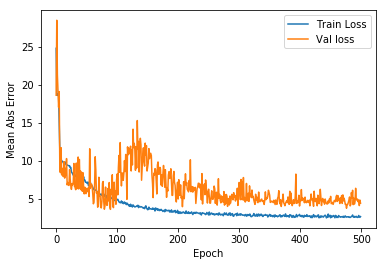

In [27]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_percentage_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_percentage_error']),
           label = 'Val loss')
    plt.legend()

plot_history(history)

In [28]:
[loss,mpe] = model.evaluate(x_test, y_test, verbose=0)
print("Testing set Mean Abs percent Error: {:7.2f}".format(mpe))

Testing set Mean Abs percent Error:    5.34
